# FIFA 18 Player Attribute Analysis

### Daniel Kari

![FIFA 18 cover photo](https://static.gamespot.com/uploads/screen_kubrick/1556/15568848/3294095-fifa18_promo_13.jpg)

This dataset was created by Aman Shrivastava and it was originally released on [Kaggle](https://www.kaggle.com/thec03u5/fifa-18-demo-player-dataset/home).

In [25]:
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from scipy.stats import probplot

In [2]:
fifa18 = pd.read_csv("fifa18.csv", index_col = 0, low_memory=False)

In [3]:
fifa18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 74 columns):
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17981 non-null object
Aggression             17981 non-null object
Agility                17981 non-null object
Balance                17981 non-null object
Ball control           17981 non-null object
Composure              17981 non-null object
Crossing               17981 non-null object
Curve                  17981 non-null ob

In [4]:
fifa18.head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€105M,...,57.0,45.0,84.0,59.0,92.0,90.0,88.0,91.0,62.0,88.0
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,€123M,...,59.0,46.0,79.0,59.0,88.0,87.0,84.0,89.0,64.0,84.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€61M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that players seem to be sorted by `Overall`.

In [5]:
fifa18.describe()

,Age,Overall,Potential,Special,CAM,CB,CDM,CF,CM,ID,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
count,17981.000000,17981.000000,17981.000000,17981.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,17981.000000,...,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000,15952.000000
mean,25.144541,66.247984,71.190813,1594.095100,59.251755,55.550464,56.865283,59.030028,58.506833,207658.710138,...,56.979689,55.550464,58.506833,56.865283,59.030028,60.057736,58.204050,59.359265,57.698721,58.204050
std,4.614272,6.987965,6.102199,272.151435,9.880164,12.192579,10.310178,9.926988,8.888040,32291.667313,...,9.791627,12.192579,8.888040,10.310178,9.926988,9.349180,9.181392,9.978084,9.142825,9.181392
min,16.000000,46.000000,46.000000,728.000000,27.000000,25.000000,26.000000,27.000000,30.000000,16.000000,...,30.000000,25.000000,30.000000,26.000000,27.000000,28.000000,31.000000,26.000000,31.000000,31.000000
25%,21.000000,62.000000,67.000000,1449.000000,53.000000,45.000000,49.000000,53.000000,53.000000,192622.000000,...,50.000000,45.000000,53.000000,49.000000,53.000000,54.000000,52.000000,53.000000,51.000000,52.000000
50%,25.000000,66.000000,71.000000,1633.000000,60.000000,57.000000,58.000000,60.000000,59.000000,214057.000000,...,58.000000,57.000000,59.000000,58.000000,60.000000,61.000000,59.000000,60.000000,58.000000,59.000000
75%,28.000000,71.000000,75.000000,1786.000000,66.000000,65.000000,65.000000,66.000000,65.000000,231448.000000,...,64.000000,65.000000,65.000000,65.000000,66.000000,67.000000,65.000000,66.000000,64.000000,65.000000
max,47.000000,94.000000,94.000000,2291.000000,92.000000,87.000000,85.000000,92.000000,87.000000,241219.000000,...,84.000000,87.000000,87.000000,85.000000,92.000000,90.000000,92.000000,91.000000,84.000000,92.000000


As we can notice, player attribute columns (Acceleration to Volleys) are of type `object`. We want to convert the attributes to numeric, since in reality each attribute gets integer value from 1 to 99. Player ID is also a categorical variable. 

In [6]:
print(fifa18['Acceleration'].max())
print(fifa18['Acceleration'].min())

96
11


In [9]:
fifa18.loc[:,'Acceleration':'Volleys'] = fifa18.loc[:,'Acceleration':'Volleys'].apply(pd.to_numeric, 
                                                                                      errors = 'coerce')
fifa18['ID'] = fifa18['ID'].astype('category')

In [10]:
fifa18.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17981 entries, 0 to 17980
Data columns (total 74 columns):
Name                   17981 non-null object
Age                    17981 non-null int64
Photo                  17981 non-null object
Nationality            17981 non-null object
Flag                   17981 non-null object
Overall                17981 non-null int64
Potential              17981 non-null int64
Club                   17733 non-null object
Club Logo              17981 non-null object
Value                  17981 non-null object
Wage                   17981 non-null object
Special                17981 non-null int64
Acceleration           17897 non-null float64
Aggression             17913 non-null float64
Agility                17910 non-null float64
Balance                17924 non-null float64
Ball control           17840 non-null float64
Composure              17887 non-null float64
Crossing               17885 non-null float64
Curve                  17908 non-

Conversion has generated some missing values, but that is not a big issue. 

In [11]:
fifa18[fifa18['Preferred Positions'].str.contains('ST')].head()

,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,€95.5M,...,61.0,53.0,82.0,62.0,91.0,89.0,92.0,91.0,66.0,92.0
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,€97M,...,64.0,58.0,80.0,65.0,88.0,85.0,88.0,87.0,68.0,88.0
5,R. Lewandowski,28,https://cdn.sofifa.org/48/18/players/188545.png,Poland,https://cdn.sofifa.org/flags/37.png,91,91,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,€92M,...,58.0,57.0,78.0,62.0,87.0,82.0,88.0,84.0,61.0,88.0
9,G. Higuaín,29,https://cdn.sofifa.org/48/18/players/167664.png,Argentina,https://cdn.sofifa.org/flags/52.png,90,90,Juventus,https://cdn.sofifa.org/24/18/teams/45.png,€77M,...,51.0,46.0,71.0,52.0,84.0,79.0,87.0,82.0,55.0,87.0
13,A. Sánchez,28,https://cdn.sofifa.org/48/18/players/184941.png,Chile,https://cdn.sofifa.org/flags/55.png,89,89,Arsenal,https://cdn.sofifa.org/24/18/teams/1.png,€67.5M,...,62.0,56.0,79.0,64.0,85.0,85.0,83.0,86.0,66.0,83.0


In [12]:
fifa18.loc[:,("Acceleration","Volleys")].head()

,Acceleration,Volleys
0,89.0,88.0
1,92.0,85.0
2,94.0,83.0
3,88.0,88.0
4,58.0,11.0


Let's look at the relationship between some of the attributes. Only 500 best players are selected simply for the sake of plot clarity. 

c:\users\danie\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\danie\appdata\local\programs\python\python37-32\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


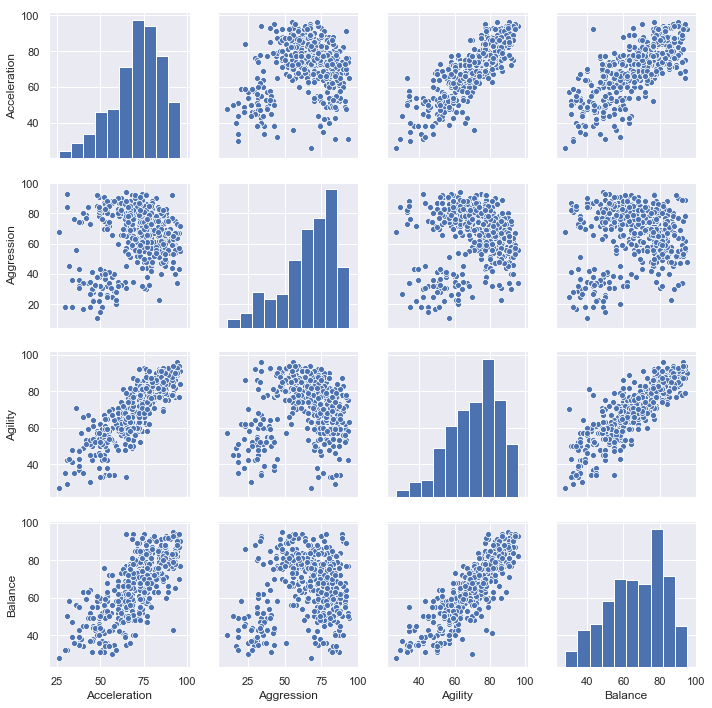

In [13]:
sns.set()
sns.pairplot(fifa18.loc[:500, "Acceleration":"Balance"])

plt.show()

There seems to be correlation between `Agility` and `Balance` and between `Agility` and `Acceleration`.

In [14]:
print(fifa18.loc[:, ("Agility", "Balance")].corr())
print(fifa18.loc[:, ("Agility", "Acceleration")].corr())

         Agility  Balance
Agility  1.00000  0.76631
Balance  0.76631  1.00000
               Agility  Acceleration
Agility       1.000000      0.799643
Acceleration  0.799643      1.000000


One interesting question is if we know value for each attribute, can we predict the player overall rating. In order to study this properly, it is considered good practice to split the data to training and test set.  

In [15]:
npr.seed(13)

index_train = npr.choice(len(fifa18), size=2000, replace=False) # Randomly select training set of size 2000

fifa18_train = fifa18.iloc[index_train, :] # Select the training data
fifa18_train = fifa18_train.loc[:, :'Volleys'] # Drop columns after attributes since we don't really need them

In [16]:
fifa18_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 6146 to 6569
Data columns (total 46 columns):
Name                  2000 non-null object
Age                   2000 non-null int64
Photo                 2000 non-null object
Nationality           2000 non-null object
Flag                  2000 non-null object
Overall               2000 non-null int64
Potential             2000 non-null int64
Club                  1976 non-null object
Club Logo             2000 non-null object
Value                 2000 non-null object
Wage                  2000 non-null object
Special               2000 non-null int64
Acceleration          1992 non-null float64
Aggression            1994 non-null float64
Agility               1994 non-null float64
Balance               1993 non-null float64
Ball control          1989 non-null float64
Composure             1990 non-null float64
Crossing              1990 non-null float64
Curve                 1996 non-null float64
Dribbling             1984

There are some missing values we need to get rid of.

In [17]:
fifa18_train = fifa18_train.dropna()

In [18]:
fifa18_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 6146 to 6569
Data columns (total 46 columns):
Name                  1913 non-null object
Age                   1913 non-null int64
Photo                 1913 non-null object
Nationality           1913 non-null object
Flag                  1913 non-null object
Overall               1913 non-null int64
Potential             1913 non-null int64
Club                  1913 non-null object
Club Logo             1913 non-null object
Value                 1913 non-null object
Wage                  1913 non-null object
Special               1913 non-null int64
Acceleration          1913 non-null float64
Aggression            1913 non-null float64
Agility               1913 non-null float64
Balance               1913 non-null float64
Ball control          1913 non-null float64
Composure             1913 non-null float64
Crossing              1913 non-null float64
Curve                 1913 non-null float64
Dribbling             1913

Now we are ready to fit the model.

In [20]:
X_train = fifa18_train.loc[:, 'Acceleration':'Volleys'] # The attributes are the explanatory variables
y_train = fifa18_train["Overall"] # Overall rating is the response we are trying to predict

In [21]:
model_fifa18 = LinearRegression().fit(X_train, y_train)

The next step is to use the remaining data as a test set. 

In [22]:
fifa18_test = fifa18[fifa18.index.isin(index_train)==False] # Select only the rows that are not in the training set
fifa18_test = fifa18_test.loc[:, :'Volleys']
fifa18_test = fifa18_test.dropna()

In [23]:
X_test = fifa18_test.loc[:, 'Acceleration':'Volleys'] 
y_test = fifa18_test["Overall"]

Now it's time to find out how our model performs. 

In [24]:
print("Coefficent of determination for the training set:", model_fifa18.score(X_train, y_train))
print("Coefficent of determination for the test set:", model_fifa18.score(X_test, y_test))

Coefficent of determination for the training set: 0.849058082229191
Coefficent of determination for the test set: 0.8453774126901049


It might initially seem surprising that `Overall` is explained by the attributes "only" by 85 percent, but in fact it is not. In FIFA 18, every player also has a defensive and attacking working rate (Low/Medium/High) and attributes that describe how good each player's weaker foot and skill moves are (1-5 stars). These attributes most likely affect the overall rating, but unfortunately they are not present in the dataset. 

In addition to that, among FIFA players it is generally assumed that overall is calculated differently for players with different positions. This means that the coefficent of determination could be higher if we fit the model e. g. only for strikers ('ST'). 

From statistical point of view, it is also crucial to check that the assumptions of linear model are valid. Probably the most fundamental assumption is that the error terms are independent and normally distributed with zero mean and equal variance. Error terms are defined as the difference between the actual response value and the predicted (fitted) value. More mathematically expressed

$$\boldsymbol{\epsilon}=\boldsymbol{y} - \boldsymbol{\hat{y}},$$

where $

In [86]:
y_hat = model_fifa18.predict(X_train)

In [87]:
residuals = y_train.values - y_hat

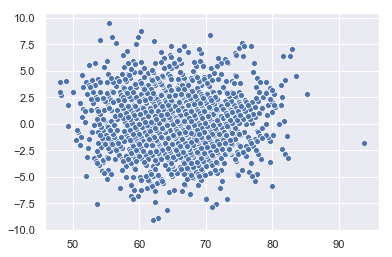

In [88]:
sns.scatterplot(y_hat, residuals)
plt.show()